# Nonogram

## Zofia Piesik

## 1. The nonogram problem

Nonograms, also known as picross or griddlers, are a type of puzzle game in which a player fills in cells of a grid to create a picture. The player is given a set of clues, which describe the number of filled cells in each row and column of the grid. The goal of the game is to use the clues to fill in the correct cells of the grid and create a picture.

## 2. Preparation - nonogram examples

Declaring 9 nonograms (three of each level):
- Level 1: 5x5
- Level 2: 10x10
- Level 3: 15x15

Each nonogram contains two arrays - the fist of the column clues and the second of the rows.

In [4]:
# nonogram_lvl_id = [[columns],[rows]]

# level 1: 5x5
nonogram_lvl1_1 = [[[3,1],[1,1],[3],[1],[3]],[[3],[1,1,1],[1,3],[1],[2]]]
nonogram_lvl1_2 = [[[2],[5],[1,2],[4],[4]],[[1,2],[5],[2,2],[4],[2]]]
nonogram_lvl1_3 = [[[1],[4],[4],[4],[3]],[[3],[4],[4],[3],[2]]]

#  level 2:  10x10
nonogram_lvl2_1 = [[[5],[3,3],[5,3],[1,3,3],[1,2,2,1],[4,3,1],[4,4],[4,3],[7],[5]],[[4],[1,3],[6],[8],[4,3],[3,1,2],[1,3,2],[10],[4,4],[8]]]
nonogram_lvl2_2 = [[[2],[4],[5],[1,3],[7],[4,3],[4,3],[4,3],[3,2],[2,1]],[[3],[4],[4],[4],[4],[1,2],[2,1],[7],[10],[9]]]
nonogram_lvl2_3 = [[[2],[4],[9],[3,4],[4,4],[10],[4],[4,5],[9],[2]],[[2,2],[4,2],[4,2],[7],[2,2,2],[3,5],[9],[5,2],[4,2],[4,1]]]

# level 3: 15x15
cols_3_1 = [[3,1,1],[5,6],[13,1],[13,1],[13,1],[7,4,1],[8,6],[6,4,1],[4,2,3],[1,3,1],[3,1],[2,3,1],[2,5,1,1],[5,1,1],[4,1,1]]
rows_3_1 = [[3,2],[7],[8,2],[10,2],[9],[8],[6,2],[5,1,3],[3,7],[15],[7,5],[7],[8,3],[1,1,1],[15]]
nonogram_lvl3_1 = [cols_3_1, rows_3_1]

cols_3_2 = [[4],[6,4],[12,1],[2,1,6],[2,5,1],[3,1,6],[3,7],[3,6],[3,1,5,1],[2,6],[12,1],[6,4],[4],[3],[5]]
rows_3_2 = [[7],[9],[2,4,2],[2,2],[2,1,1,2],[3,2],[2,2],[3,3,1],[9,1],[9,1],[11,2],[15],[14],[2,3,2],[1,1,1,1,1,1,1]]
nonogram_lvl3_2 = [cols_3_2, rows_3_2]

cols_3_3 = [[3],[4],[3,6],[1,3,5],[2,3,4],[2,6],[8],[8],[3,3],[2,6],[3,4],[4,2],[7],[2,5],[1,5]]
rows_3_3 = [[5,5],[11],[7],[5,3],[6,3],[8,3],[1,6,3],[8,2],[3,3,1],[3,2],[3,1],[3],[4],[3],[3]]
nonogram_lvl3_3 = [cols_3_3, rows_3_3]

## 3. The first genetic alorithm model

### 3.1. Chromosomes

The chromosomes are represented by an array of zeros and ones. Ones are filled squares. Zeros are empty squares. The number of elements in a chromosome depends on the level of nonogram. Level 1 has 25, level 2 has 100 and level 3 has 225.

### 3.2 Mutations 

The use of mutations significantly affects finding the best result. For easier nonograms, it is enough to use a "random" mutation for one gene (4%).


### 3.3 Fitness function

The fitness function splits the solution into sequences by columns and rows. It checks whether the clue from the row/column agrees with the block in the sequence. It gets one fitness point for each correct clue. The number of points is in range from 0 to numbers of all clues(the best solution).

e.g.
For nonogram: `[[[3,1],[1,1],[3],[1],[3]],[[3],[1,1,1],[1,3],[1],[2]]]` the best score is `15`

In [15]:
# Import the libraries we wil need
import pygad, matplotlib as plt
import numpy as np
plt.style.use("default")

# Define the function nonogram which 
def nonogram_ga(nonogram, printing=True):
    
    # Same for all nonograms
    gene_space = [0,1]
    
    nonogram_size = len(nonogram[0]) 
    num_genes = nonogram_size**2
    keep_parents = 2
    
    # Set population settings depends on nonogram size
    if (nonogram_size == 5):
        sol_per_pop = 120
        num_parents_mating = 60
        num_generations = 40
        parent_selection_type = "sss"
        crossover_type = "single_point"
        mutation_type = "random"
        mutation_percent_genes = 4
        
    elif (nonogram_size == 10):
        sol_per_pop = 300
        num_parents_mating = 100
        num_generations = 500
        parent_selection_type = "sss"
        crossover_type = "two_points"
        mutation_type = "random"
        mutation_percent_genes = 1
    
    elif (nonogram_size == 15):
        sol_per_pop = 300
        num_parents_mating = 150
        num_generations = 700
        parent_selection_type = "sss"
        crossover_type = "two_points"
        mutation_type = "random"
        mutation_percent_genes = 1
        
    else:
        print("Error: Nonogram size is not 5x5, 10x10 or 15x15!")
        return False
        
    #  FITNESS FUNCTION
    # Helper function to check each clue of the sequence
    def fitness_sequence(sequence, clues):
        fitness = 0
        seq_id = 0
        
        for clue in clues: # Iterate over each clue
            
            #  Skip zeros in sequence
            while seq_id < len(sequence) and sequence[seq_id] == 0:
                seq_id += 1
                
            if seq_id == len(sequence):
                break
            
            # Count ones and check it matches to clue
            block_len = 0
            while seq_id < len(sequence) and sequence[seq_id] == 1:
                block_len += 1
                seq_id += 1
            
            if block_len == clue:
                # +1 point for each correct block
                fitness += 1
        
        if(seq_id < len(sequence)):
            # -1 point for each additional block
            fitness -= np.sum(sequence[seq_id:])
        
        return fitness

    # Main fitness function
    def fitness_func(solution, solution_idx):
        # Splits nonogram for columns and rows
        col_clues = np.array(nonogram[0], dtype=object)
        row_clues = np.array(nonogram[1], dtype=object)
        
        # Splits soluton to arrays of nonogram size
        grid = solution.reshape((len(row_clues), len(col_clues)))
        score = 0
        
        #  Checks each column solution
        for i in range(len(col_clues)):
            col_score = fitness_sequence(grid[:, i], col_clues[i])
            score += col_score
            
        # Checks each row solution
        for j in range(len(row_clues)):
            row_score = fitness_sequence(grid[j, :], row_clues[j])
            score += row_score
        return round(score,2)

        
    ga_instance = pygad.GA(fitness_func=fitness_func,
                           gene_space=gene_space,
                           num_genes=num_genes,
                           sol_per_pop=sol_per_pop,
                           num_parents_mating=num_parents_mating,
                           num_generations=num_generations,
                           keep_parents=keep_parents,
                           parent_selection_type=parent_selection_type,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes
                           )
    
    
    ga_instance.run()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    # Function to validate the best solution, returns the precentage result.
    def accuracy_sol(nonogram, sol_fitness):
        col = np.concatenate( nonogram[0])
        row = np.concatenate(nonogram[1])
        clue_length = col.size + row.size
        return round(((sol_fitness*100)/clue_length),2)
    
    if (printing):
        # Nonogram
        print("Nonogram: ", nonogram)
        
        # Best solution 
        print("Best solution:")
        for i in range(0,len(nonogram[0])**2,len(nonogram[0])):
            print(solution[i:i+len(nonogram[0])])
            
        # Fitness score
        print("Solution score: ", solution_fitness)
        
        #  Accuracy 0-100%
        print("Accuracy: ", accuracy_sol(nonogram, solution_fitness),"%")
        
        # Shows plot - best scores in generations
        ga_instance.plot_fitness()
        
    return accuracy_sol(nonogram, solution_fitness)

### 3.4 Solutions

Nonogram:  [[[3, 1], [1, 1], [3], [1], [3]], [[3], [1, 1, 1], [1, 3], [1], [2]]]
Best solution:
[1. 1. 1. 0. 0.]
[1. 0. 1. 0. 1.]
[1. 0. 1. 1. 1.]
[0. 0. 0. 0. 1.]
[1. 1. 0. 0. 0.]
Solution score:  15.0
Accuracy:  100.0 %


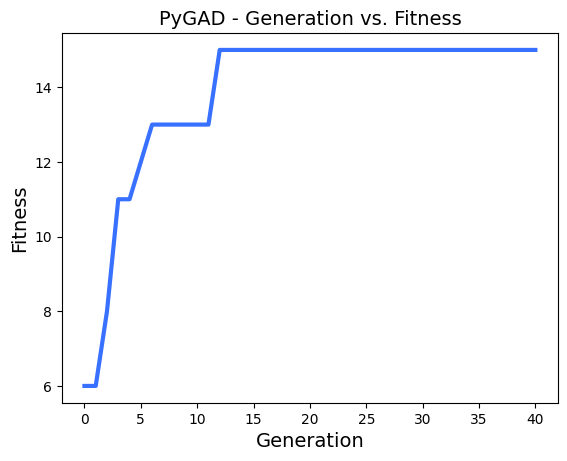

100.0

In [831]:
#  level 1 - 1
nonogram_ga(nonogram_lvl1_1)

Nonogram:  [[[2], [5], [1, 2], [4], [4]], [[1, 2], [5], [2, 2], [4], [2]]]
Best solution:
[0. 1. 0. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 0. 1. 1.]
[0. 1. 1. 1. 1.]
[0. 1. 1. 0. 0.]
Solution score:  13.0
Accuracy:  100.0 %


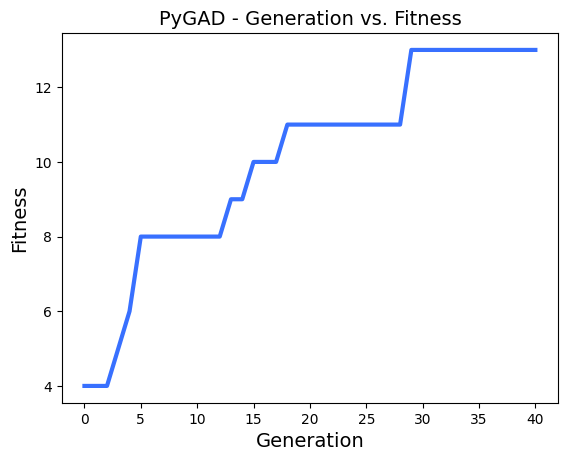

100.0

In [832]:
# level 1 - 2
nonogram_ga(nonogram_lvl1_2)

Nonogram:  [[[1], [4], [4], [4], [3]], [[3], [4], [4], [3], [2]]]
Best solution:
[0. 0. 1. 1. 1.]
[0. 1. 1. 1. 1.]
[0. 1. 1. 1. 1.]
[0. 1. 1. 1. 0.]
[1. 1. 0. 0. 0.]
Solution score:  10.0
Accuracy:  100.0 %


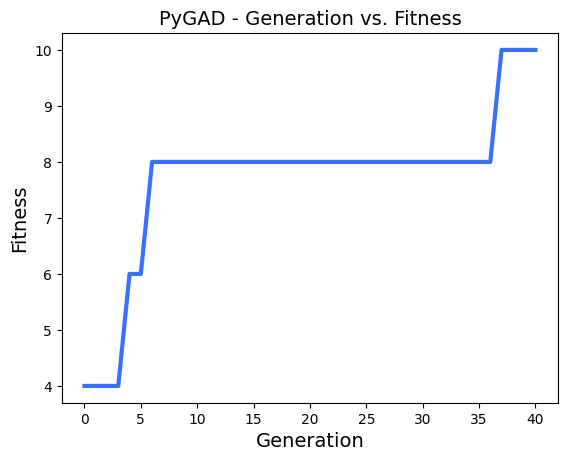

100.0

In [833]:
# level 1 - 3
nonogram_ga(nonogram_lvl1_3)

Nonogram:  [[[5], [3, 3], [5, 3], [1, 3, 3], [1, 2, 2, 1], [4, 3, 1], [4, 4], [4, 3], [7], [5]], [[4], [1, 3], [6], [8], [4, 3], [3, 1, 2], [1, 3, 2], [10], [4, 4], [8]]]
Best solution:
[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
[1. 0. 0. 1. 1. 1. 0. 0. 1. 1.]
[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Solution score:  27.0
Accuracy:  71.05 %


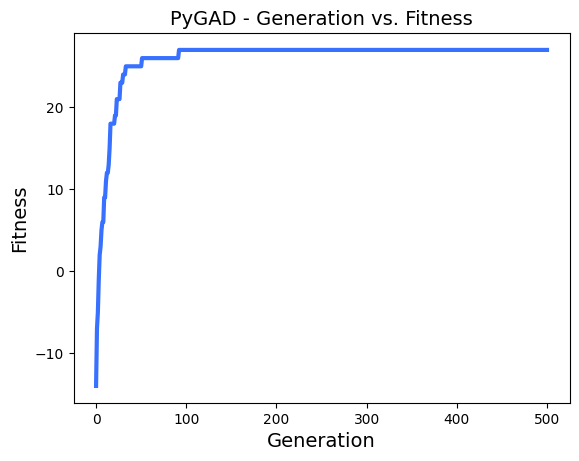

71.05

In [16]:
# level 2 - 1
nonogram_ga(nonogram_lvl2_1)

Nonogram:  [[[2], [4], [5], [1, 3], [7], [4, 3], [4, 3], [4, 3], [3, 2], [2, 1]], [[3], [4], [4], [4], [4], [1, 2], [2, 1], [7], [10], [9]]]
Best solution:
[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
[1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Solution score:  18.0
Accuracy:  64.29 %


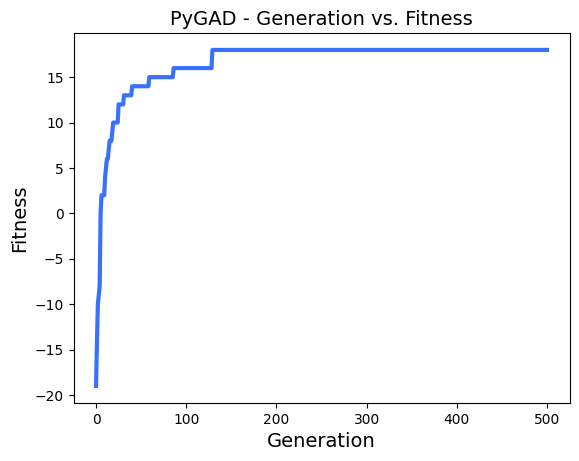

64.29

In [835]:
# level 2 - 2
nonogram_ga(nonogram_lvl2_2)

Nonogram:  [[[2], [4], [9], [3, 4], [4, 4], [10], [4], [4, 5], [9], [2]], [[2, 2], [4, 2], [4, 2], [7], [2, 2, 2], [3, 5], [9], [5, 2], [4, 2], [4, 1]]]
Best solution:
[0. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[1. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
Solution score:  19.0
Accuracy:  59.38 %


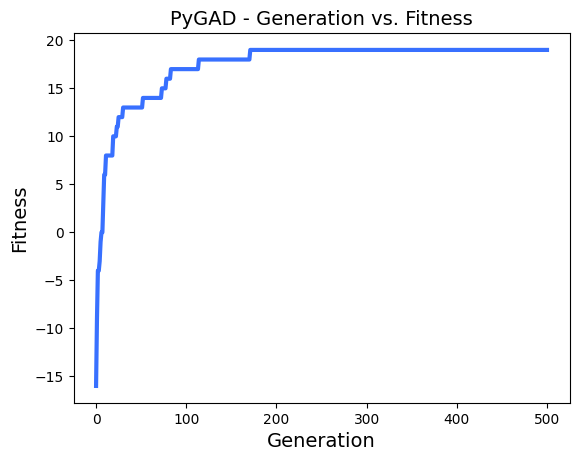

59.38

In [836]:
# level 2 - 3
nonogram_ga(nonogram_lvl2_3)

Nonogram:  [[[3, 1, 1], [5, 6], [13, 1], [13, 1], [13, 1], [7, 4, 1], [8, 6], [6, 4, 1], [4, 2, 3], [1, 3, 1], [3, 1], [2, 3, 1], [2, 5, 1, 1], [5, 1, 1], [4, 1, 1]], [[3, 2], [7], [8, 2], [10, 2], [9], [8], [6, 2], [5, 1, 3], [3, 7], [15], [7, 5], [7], [8, 3], [1, 1, 1], [15]]]
Best solution:
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]


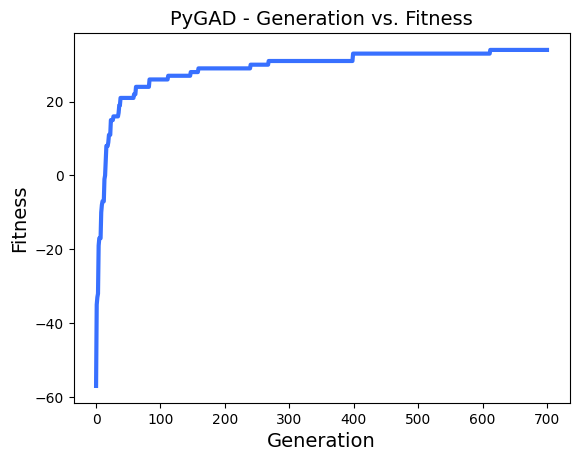

51.52

In [837]:
# level 3 - 1
nonogram_ga(nonogram_lvl3_1)

Nonogram:  [[[4], [6, 4], [12, 1], [2, 1, 6], [2, 5, 1], [3, 1, 6], [3, 7], [3, 6], [3, 1, 5, 1], [2, 6], [12, 1], [6, 4], [4], [3], [5]], [[7], [9], [2, 4, 2], [2, 2], [2, 1, 1, 2], [3, 2], [2, 2], [3, 3, 1], [9, 1], [9, 1], [11, 2], [15], [14], [2, 3, 2], [1, 1, 1, 1, 1, 1, 1]]]
Best solution:
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.

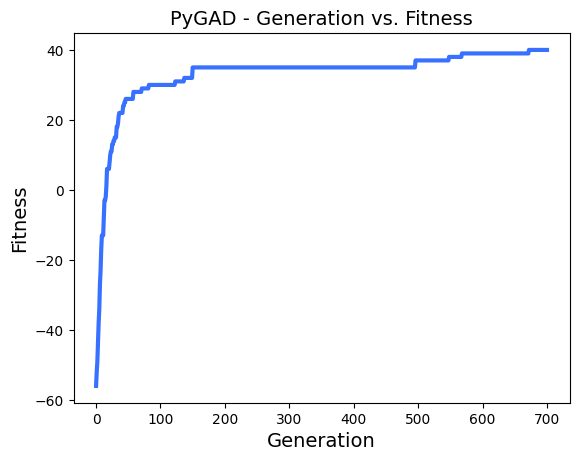

59.7

In [838]:
# level 3 - 2
nonogram_ga(nonogram_lvl3_2)

Nonogram:  [[[3], [4], [3, 6], [1, 3, 5], [2, 3, 4], [2, 6], [8], [8], [3, 3], [2, 6], [3, 4], [4, 2], [7], [2, 5], [1, 5]], [[5, 5], [11], [7], [5, 3], [6, 3], [8, 3], [1, 6, 3], [8, 2], [3, 3, 1], [3, 2], [3, 1], [3], [4], [3], [3]]]
Best solution:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
[0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
Solution score:  29.0
Accuracy:  54.72 %


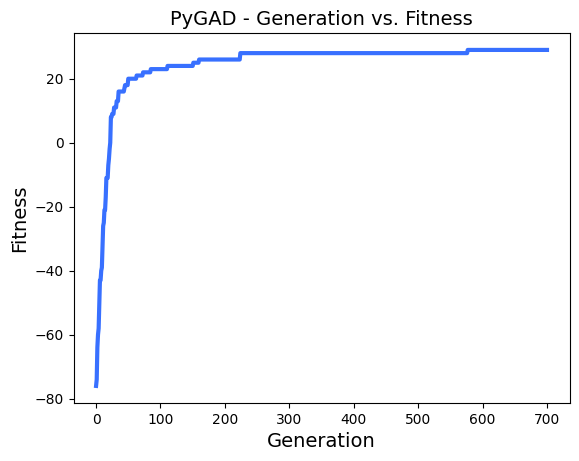

54.72

In [839]:
# level 3 - 3
nonogram_ga(nonogram_lvl3_3)

## 4. Fitness function 2

The function works similarly to the first function, on the same chromosomes. The difference is that there is a different scoring. The function awards 1 point each for all clues in a row/column. It gets partial points for completing part of a clue. E.g. for clues [1,2,3,4] and guessing only 1 we get 0.25 points.


In [7]:
# fitness function 2

def nonogram_ga2(nonogram, printing=True):
    
    nonogram_size = len(nonogram[0])
    gene_space = [0,1]
    num_genes = nonogram_size**2
    keep_parents = 2

# Set population settings depends on nonogram size
    if (nonogram_size == 5):
        sol_per_pop = 120
        num_parents_mating = 60
        num_generations = 40
        parent_selection_type = "sss"
        crossover_type = "single_point"
        mutation_type = "random"
        mutation_percent_genes = 4
        
    elif (nonogram_size == 10):
        sol_per_pop = 300
        num_parents_mating = 100
        num_generations = 500
        parent_selection_type = "sss"
        crossover_type = "two_points"
        mutation_type = "random"
        mutation_percent_genes = 2
    
    elif (nonogram_size == 15):
        sol_per_pop = 300
        num_parents_mating = 150
        num_generations = 700
        parent_selection_type = "sss"
        crossover_type = "two_points"
        mutation_type = "random"
        mutation_percent_genes = 1
        
    else:
        print("Error: Nonogram size is not 5x5, 10x10 or 15x15!")
        return False

        
    def fitness_sequence(solution, clues):
        filled_blocks = 0
        total_blocks = len(clues)
        current_block = 0
        clue_idx = 0   # Initialize the current clue index to 0
        
        for i in range(len(solution)):
            if solution[i] == 1:
                current_block += 1
            elif current_block > 0:
                if clue_idx < len(clues) and current_block == clues[clue_idx]:   # Check if the current block length matches the current clue
                    filled_blocks += 1
                clue_idx += 1   # Increment the current clue index
                current_block = 0
                
            if current_block > 0 and i == len(solution) - 1:
                if clue_idx < len(clues) and current_block == clues[clue_idx]:   # Check if the current block length matches the current clue
                    filled_blocks += 1  
        return (filled_blocks / total_blocks) if total_blocks > 0 else 1


    def fitness_func(solution, solution_idx):
        col_clues = np.array(nonogram[0], dtype=object)
        row_clues = np.array(nonogram[1], dtype=object)
        grid = solution.reshape((len(row_clues), len(col_clues)))
        score = 0
        for i in range(len(row_clues)):
            row_score = fitness_sequence(grid[i, :], row_clues[i])
            score += row_score
        for j in range(len(col_clues)):
            col_score = fitness_sequence(grid[:, j], col_clues[j])
            score += col_score
        return score

        
    ga_instance = pygad.GA(fitness_func=fitness_func,
                            gene_space=gene_space,
                            num_genes=num_genes,
                            sol_per_pop=sol_per_pop,
                            num_parents_mating=num_parents_mating,
                            num_generations=num_generations,
                            keep_parents=keep_parents,
                            parent_selection_type=parent_selection_type,
                            crossover_type=crossover_type,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes
                            )
    
    ga_instance.run()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    # Function to validate the best solution, returns the precentage result.
    def accuracy_sol2(nonogram, sol_fitness):
        return round(((sol_fitness*100)/(len(nonogram[0])*2)),2)
    
    if (printing):
        # Nonogram
        print("Nonogram: ", nonogram)
        
        # Best solution 
        print("Best solution:")
        for i in range(0,len(nonogram[0])**2,len(nonogram[0])):
            print(solution[i:i+len(nonogram[0])])
            
        # Fitness score
        print("Solution score: ", solution_fitness)
        
        #  Accuracy 0-100%
        print("Accuracy: ", accuracy_sol2(nonogram, solution_fitness),"%")
        
        # Shows plot - best scores in generations
        
        ga_instance.plot_fitness()
    
    return accuracy_sol2(nonogram, solution_fitness)
    

### 4.4 Solutions - Fitness function 2

Nonogram:  [[[3, 1], [1, 1], [3], [1], [3]], [[3], [1, 1, 1], [1, 3], [1], [2]]]
Best solution:
[1. 1. 1. 0. 0.]
[1. 0. 1. 0. 1.]
[1. 0. 1. 1. 1.]
[0. 0. 0. 0. 1.]
[1. 1. 0. 0. 0.]
Solution score:  10.0
Accuracy:  100.0 %


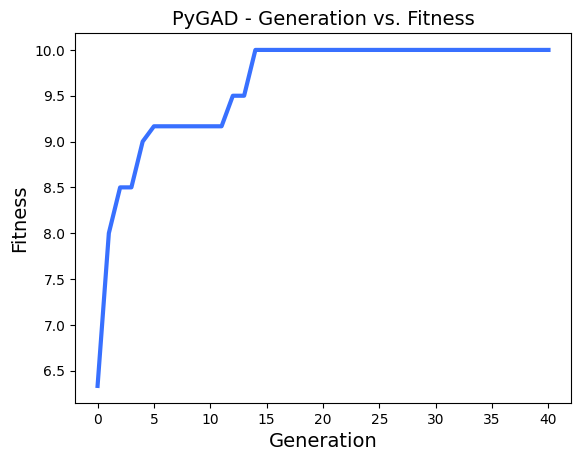

100.0

In [841]:
#  level 1 - 1
nonogram_ga2(nonogram_lvl1_1)

Nonogram:  [[[2], [5], [1, 2], [4], [4]], [[1, 2], [5], [2, 2], [4], [2]]]
Best solution:
[0. 1. 0. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 0. 1. 1.]
[0. 1. 1. 1. 1.]
[1. 1. 0. 0. 0.]
Solution score:  9.5
Accuracy:  95.0 %


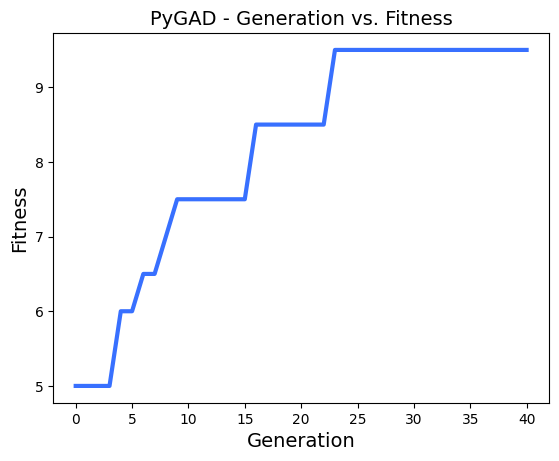

95.0

In [842]:
#  level 1 - 2
nonogram_ga2(nonogram_lvl1_2)

Nonogram:  [[[1], [4], [4], [4], [3]], [[3], [4], [4], [3], [2]]]
Best solution:
[0. 0. 1. 1. 1.]
[0. 1. 1. 1. 1.]
[0. 1. 1. 1. 1.]
[0. 1. 1. 1. 0.]
[1. 1. 0. 0. 1.]
Solution score:  10.0
Accuracy:  100.0 %


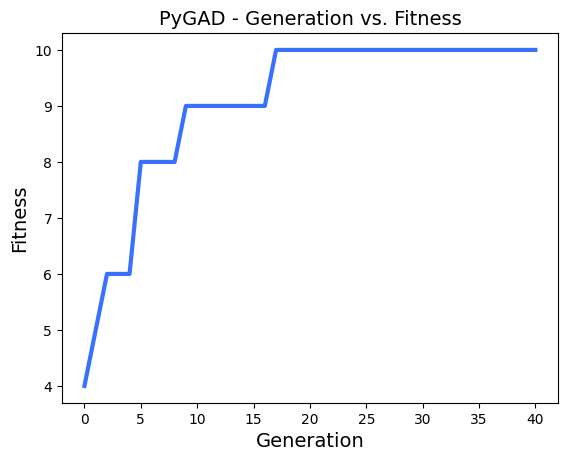

100.0

In [843]:
#  level 1 - 3
nonogram_ga2(nonogram_lvl1_3)

Nonogram:  [[[5], [3, 3], [5, 3], [1, 3, 3], [1, 2, 2, 1], [4, 3, 1], [4, 4], [4, 3], [7], [5]], [[4], [1, 3], [6], [8], [4, 3], [3, 1, 2], [1, 3, 2], [10], [4, 4], [8]]]
Best solution:
[0. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 1. 1. 0. 1.]
[0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 1. 0. 0. 0. 1. 1. 1.]
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
[1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Solution score:  17.833333333333336
Accuracy:  89.17 %


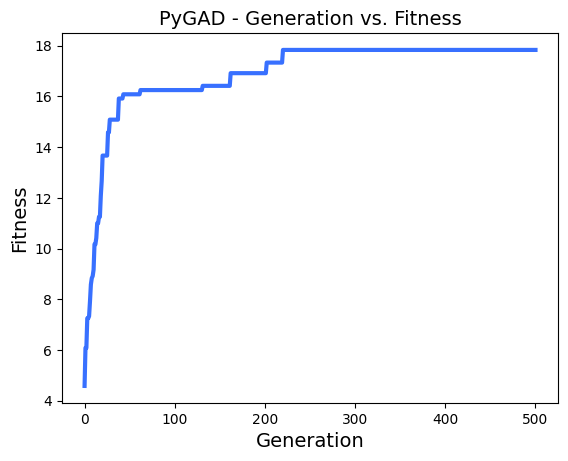

89.17

In [844]:
#  level 2 - 1
nonogram_ga2(nonogram_lvl2_1)

Nonogram:  [[[2], [4], [5], [1, 3], [7], [4, 3], [4, 3], [4, 3], [3, 2], [2, 1]], [[3], [4], [4], [4], [4], [1, 2], [2, 1], [7], [10], [9]]]
Best solution:
[1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
[0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
[1. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
[1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Solution score:  18.0
Accuracy:  90.0 %


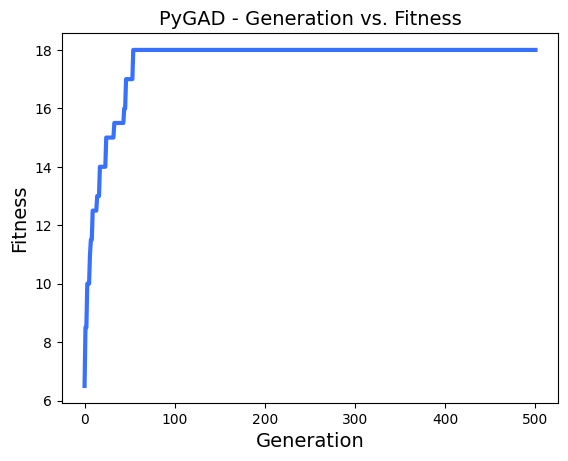

90.0

In [845]:
#  level 2 - 2
nonogram_ga2(nonogram_lvl2_2)

Nonogram:  [[[2], [4], [9], [3, 4], [4, 4], [10], [4], [4, 5], [9], [2]], [[2, 2], [4, 2], [4, 2], [7], [2, 2, 2], [3, 5], [9], [5, 2], [4, 2], [4, 1]]]
Best solution:
[1. 1. 0. 0. 0. 0. 1. 1. 0. 1.]
[1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
[0. 0. 1. 0. 1. 1. 0. 1. 1. 0.]
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
Solution score:  16.666666666666668
Accuracy:  83.33 %


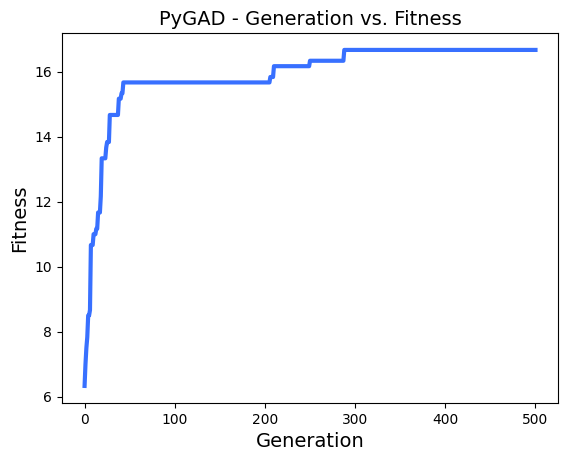

83.33

In [846]:
#  level 2 - 3
nonogram_ga2(nonogram_lvl2_3)

Nonogram:  [[[3, 1, 1], [5, 6], [13, 1], [13, 1], [13, 1], [7, 4, 1], [8, 6], [6, 4, 1], [4, 2, 3], [1, 3, 1], [3, 1], [2, 3, 1], [2, 5, 1, 1], [5, 1, 1], [4, 1, 1]], [[3, 2], [7], [8, 2], [10, 2], [9], [8], [6, 2], [5, 1, 3], [3, 7], [15], [7, 5], [7], [8, 3], [1, 1, 1], [15]]]
Best solution:
[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]


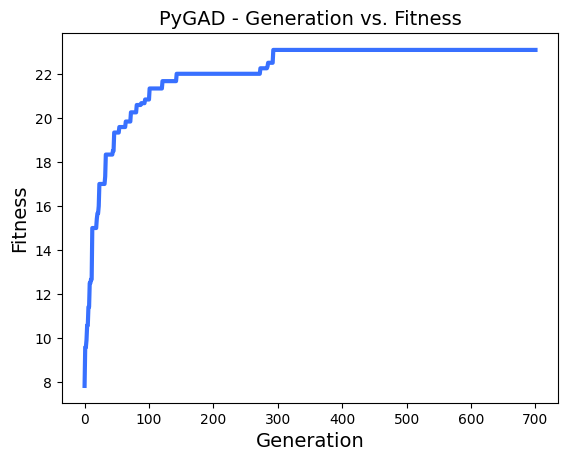

76.94

In [847]:
#  level 3 - 1
nonogram_ga2(nonogram_lvl3_1)

Nonogram:  [[[4], [6, 4], [12, 1], [2, 1, 6], [2, 5, 1], [3, 1, 6], [3, 7], [3, 6], [3, 1, 5, 1], [2, 6], [12, 1], [6, 4], [4], [3], [5]], [[7], [9], [2, 4, 2], [2, 2], [2, 1, 1, 2], [3, 2], [2, 2], [3, 3, 1], [9, 1], [9, 1], [11, 2], [15], [14], [2, 3, 2], [1, 1, 1, 1, 1, 1, 1]]]
Best solution:
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
[1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.]
[1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
[1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
[1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
[0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
[1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.]
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.

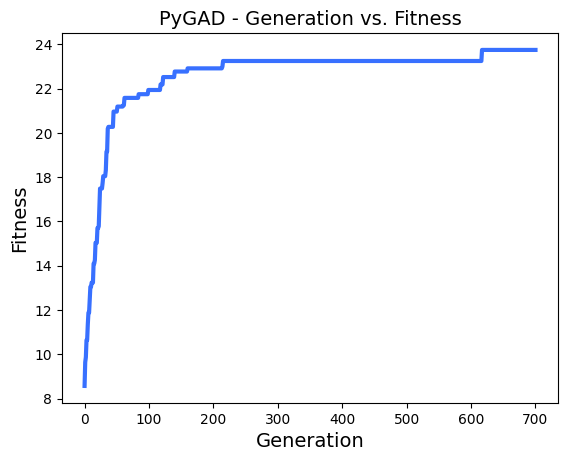

79.17

In [848]:
#  level 3 - 2
nonogram_ga2(nonogram_lvl3_2)

Nonogram:  [[[3], [4], [3, 6], [1, 3, 5], [2, 3, 4], [2, 6], [8], [8], [3, 3], [2, 6], [3, 4], [4, 2], [7], [2, 5], [1, 5]], [[5, 5], [11], [7], [5, 3], [6, 3], [8, 3], [1, 6, 3], [8, 2], [3, 3, 1], [3, 2], [3, 1], [3], [4], [3], [3]]]
Best solution:
[0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
[0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
[1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
[0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
Solution score:  25.0
Accuracy:  83.33 %


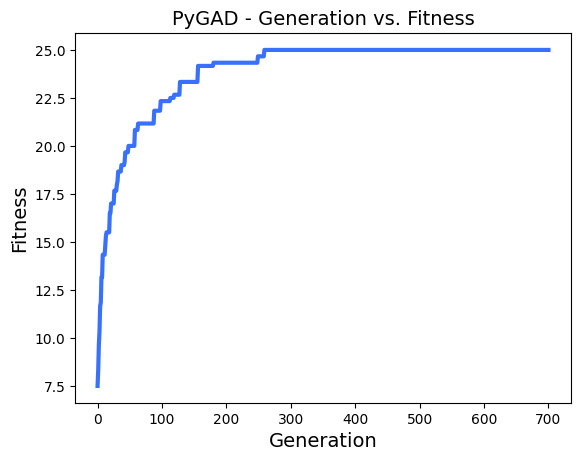

83.33

In [849]:
#  level 3 - 3
nonogram_ga2(nonogram_lvl3_3)

## 5. Efficiency

Checks two the algorithms 100 times for level 1 nonograms - if its correctness is >= 90% adds its execution time to a separate table. Calculates average execution time of correct algorithms. Repeats the experiment for level 2 and 3.

In [12]:
import random, time

lvl1 = [nonogram_lvl1_1,nonogram_lvl1_2,nonogram_lvl1_3]
lvl2 = [nonogram_lvl2_1,nonogram_lvl2_2,nonogram_lvl2_3]
lvl3 = [nonogram_lvl3_1,nonogram_lvl3_2,nonogram_lvl3_3]

def check_efficiency(fitness, level, N, accuracy_percent):
    opt_results = 0
    exec_time = []
    sum_accuracy = 0
    if (fitness == 1 ):
        for i in range(N):
            r = random.randint(0,2)
            start = time.time()
            accuracy = nonogram_ga(level[r], False)
            stop = time.time()
            if (accuracy >= accuracy_percent):
                opt_results += 1
                exec_time.append(stop-start)
            sum_accuracy += accuracy
    
    elif (fitness == 2 ):
        for i in range(N):
            r = random.randint(0,2)
            start = time.time()
            accuracy = nonogram_ga2(level[r], False)
            stop = time.time()
            if (accuracy >= accuracy_percent):
                opt_results += 1
                exec_time.append(stop-start)
            sum_accuracy += accuracy

    avg_accuracy = sum_accuracy//N
    avg_time = sum(exec_time)/opt_results if opt_results > 0 else 0
    print("Average time: ", avg_time)
    print("Correct solutions: ", opt_results)
    print("Average accuracy for all: ", avg_accuracy)
    return avg_time, opt_results, avg_accuracy

### 5.1 The first fitness

In [851]:
#  Level 1
check_efficiency(1, lvl1, 100, 95)  

Average time:  0.3973554634466404
Correct solutions:  82
Average accuracy for all:  96.0


(0.3973554634466404, 82, 96.0)

In [852]:
#  Level 2
check_efficiency(1, lvl2, 100, 85) 

Average time:  25.788447459538776
Correct solutions:  3
Average accuracy for all:  65.0


(25.788447459538776, 3, 65.0)

In [19]:
#  Level 3
check_efficiency(1, lvl3, 100, 70) 

Average time:  0
Correct solutions:  0
Average accuracy for all:  55.0


(0, 0, 55.0)

### 5.2 The second fitness

In [ ]:
#  Level 1
check_efficiency(2, lvl1, 100, 95)  

Average time:  0.22240839199144014
Correct solutions:  98
Average accuracy for all:  99.0


(0.22240839199144014, 98, 99.0)

In [17]:
#  Level 2
check_efficiency(2, lvl2, 100, 85) 

Average time:  17.742265331211375
Correct solutions:  67
Average accuracy for all:  86.0


(17.742265331211375, 67, 86.0)

In [18]:
#  Level 3
check_efficiency(2, lvl3, 100, 70) 

Average time:  47.4553401543922
Correct solutions:  97
Average accuracy for all:  78.0


(47.4553401543922, 97, 78.0)

## 6. Summary

In the tables below, it is easy to see that the second fitness function performed much better and faster than the first function. This is due to the fact that the scoring is more precise. In the most difficult case, the average of all scores is as high as 78% correct - perhaps not a perfect score, but quite impressive if the chromosome has as many as 225 genes.


Fitness 1:
   Level  Average time  Correct solutions  Average accuracy for all
0      1      0.397355                 82                      96.0
1      2     25.788447                  3                      65.0
2      3      0.000000                  0                      55.0

Fitness 2:
   Level  Average time  Correct solutions  Average accuracy for all
0      1      0.222408                 98                      99.0
1      2     17.742265                 67                      86.0
2      3     47.455340                 97                      78.0


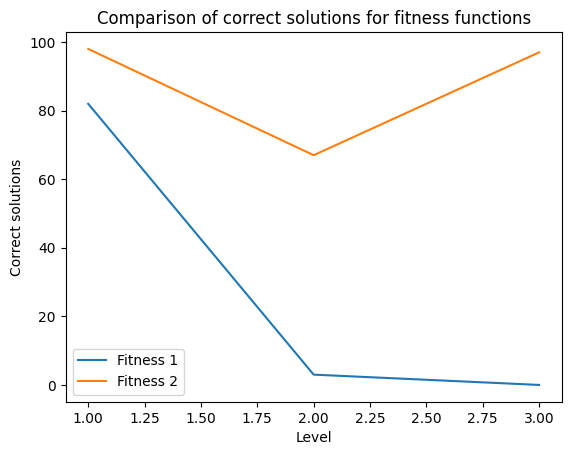

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# data for fitness 1
fitness1 = {
    'Level': [1, 2, 3],
    'Average time': [0.3973554634466404, 25.788447459538776, 0],
    'Correct solutions': [82, 3, 0],
    'Average accuracy for all': [96.0, 65.0, 55.0]
}

# data for fitness 2
fitness2 = {
    'Level': [1, 2, 3],
    'Average time': [0.22240839199144014, 17.742265331211375, 47.4553401543922],
    'Correct solutions': [98, 67, 97],
    'Average accuracy for all': [99.0, 86.0, 78.0]
}

# creating tables 
df1 = pd.DataFrame(fitness1, columns=['Level', 'Average time', 'Correct solutions', 'Average accuracy for all'])
df2 = pd.DataFrame(fitness2, columns=['Level', 'Average time', 'Correct solutions', 'Average accuracy for all'])

# show tables
print("Fitness 1:")
print(df1)
print("\nFitness 2:")
print(df2)

# creating graph
fig, ax = plt.subplots()
ax.plot(df1['Level'], df1['Correct solutions'], label='Fitness 1')
ax.plot(df2['Level'], df2['Correct solutions'], label='Fitness 2')
ax.set_xlabel('Level')
ax.set_ylabel('Correct solutions')
ax.set_title('Comparison of correct solutions for fitness functions')
ax.legend()
plt.show()

## Bibliography
- PyGad Documentation: https://pygad.readthedocs.io
- NumPy: https://numpy.org/doc
- Matplotlib: https://matplotlib.org
- Examples of nonograms: https://nonogram.com
- Pandas: https://pandas.pydata.org/docs/